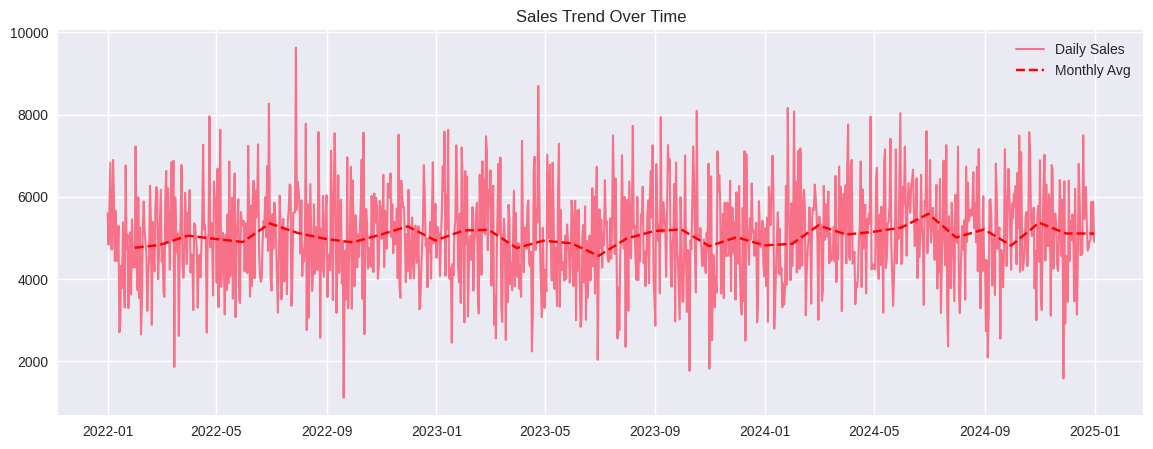

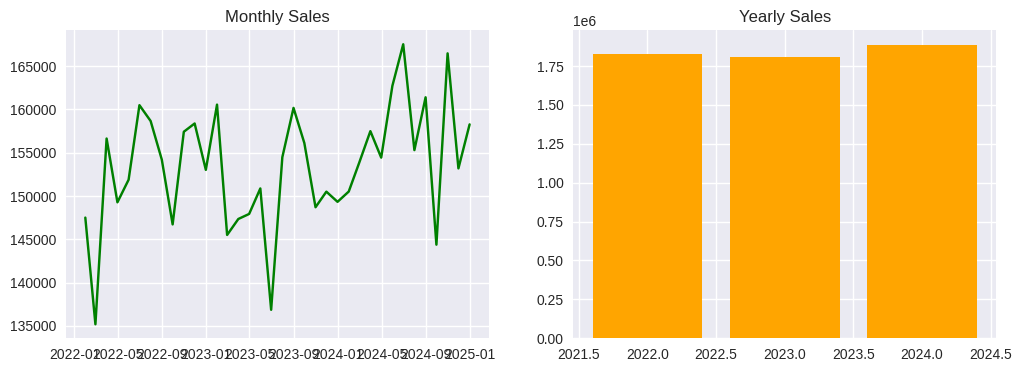

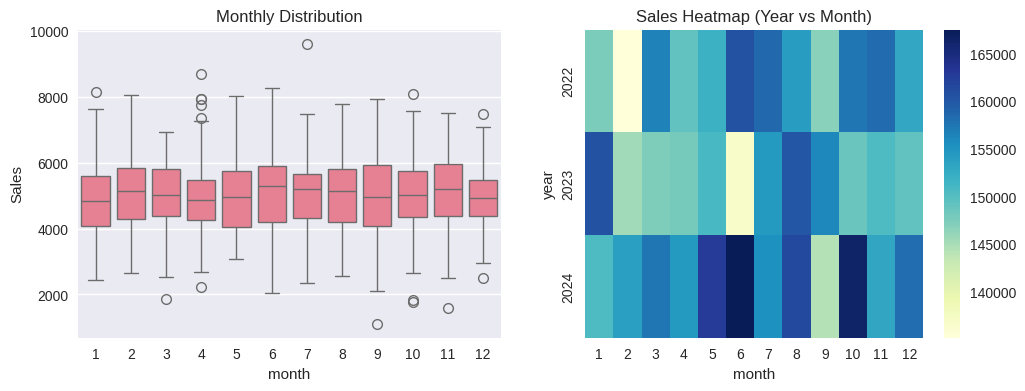

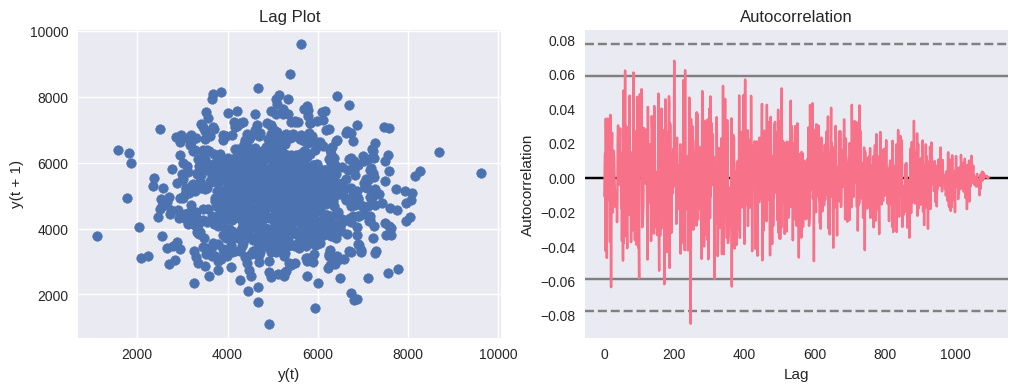

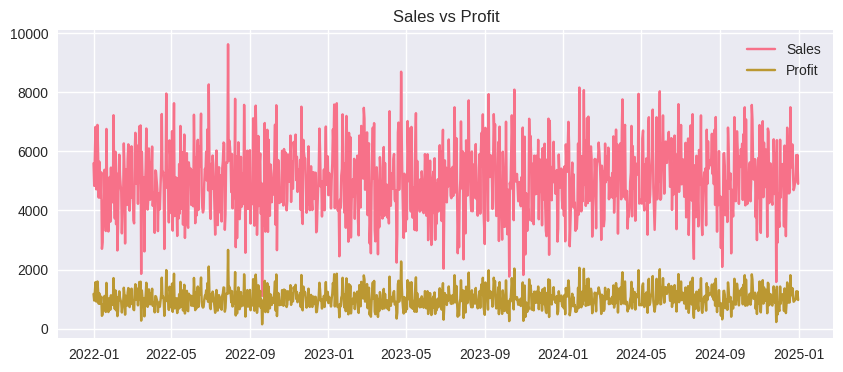

             Category Region    Sales  year  month  quarter       profit  \
Date                                                                       
2022-01-01  Beverages  South  5596.06  2022      1        1  1174.804844   
2022-01-02     Fruits   East  4834.08  2022      1        1   953.448386   
2022-01-03     Fruits   West  5777.23  2022      1        1  1230.282913   
2022-01-04      Dairy   West  6827.64  2022      1        1  1573.501991   
2022-01-05     Bakery  North  4719.02  2022      1        1   921.704511   

            profit_margin  
Date                       
2022-01-01       0.209934  
2022-01-02       0.197235  
2022-01-03       0.212954  
2022-01-04       0.230461  
2022-01-05       0.195317  


In [3]:


import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from pandas.plotting import lag_plot, autocorrelation_plot
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8'); sns.set_palette("husl")

# 1️⃣ Load and Prepare Data
df = pd.read_excel("///Groceries_Sales_data.xlsx")
df['Date'] = pd.to_datetime(df['Date']); df.set_index('Date', inplace=True)
df['year'], df['month'], df['quarter'] = df.index.year, df.index.month, df.index.quarter

# 2️⃣ Trend Analysis
plt.figure(figsize=(14,5))
plt.plot(df.index, df['Sales'], label='Daily Sales', linewidth=1.5)
plt.plot(df['Sales'].resample('M').mean(), 'r--', label='Monthly Avg')
plt.title('Sales Trend Over Time'); plt.legend(); plt.show()

# 3️⃣ Monthly & Yearly Overview
monthly = df['Sales'].resample('M').sum(); yearly = df['Sales'].resample('Y').sum()
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(monthly.index, monthly.values, color='green'); ax[0].set_title('Monthly Sales')
ax[1].bar(yearly.index.year, yearly.values, color='orange'); ax[1].set_title('Yearly Sales')
plt.show()

# 4️⃣ Seasonality & Distribution
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(x='month', y='Sales', data=df, ax=ax[0]); ax[0].set_title('Monthly Distribution')
sns.heatmap(df.groupby(['year','month'])['Sales'].sum().unstack(), cmap='YlGnBu', ax=ax[1])
ax[1].set_title('Sales Heatmap (Year vs Month)'); plt.show()

# 5️⃣ Lag & Autocorrelation
fig, ax = plt.subplots(1,2, figsize=(12,4))
lag_plot(df['Sales'], ax=ax[0]); autocorrelation_plot(df['Sales'], ax=ax[1])
ax[0].set_title('Lag Plot'); ax[1].set_title('Autocorrelation'); plt.show()

# 6️⃣ Profit Analysis (Simulated if Missing)
if 'profit' not in df.columns:
    np.random.seed(42)
    df['profit'] = df['Sales'] * 0.2 * (1 + np.random.normal(0, 0.1, len(df)))
df['profit_margin'] = df['profit'] / df['Sales']
plt.figure(figsize=(10,4))
plt.plot(df['Sales'], label='Sales'); plt.plot(df['profit'], label='Profit')
plt.title('Sales vs Profit'); plt.legend(); plt.show()
print(df.head())